### A classic problem in the field of pattern recognition is the handwritten digit recognition. We are given images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

 

### The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Package to filter warnings
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

In [3]:
#reading train dataset
digit = pd.read_csv(r'E:\Data Science\SVM\Assignment\train.csv')
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#function to display each digit
def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

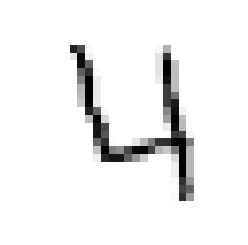

In [5]:
some_digit = digit.iloc[3,1:]
plot_digit(some_digit)

In [7]:
#displaying the shape
digit.shape

(42000, 785)

### Test Train Split

In [8]:
#putting the variables on x
X = digit.drop('label', axis=1)
#putting feature variable on y
y = digit['label']

In [9]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [11]:
#function to display digits
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

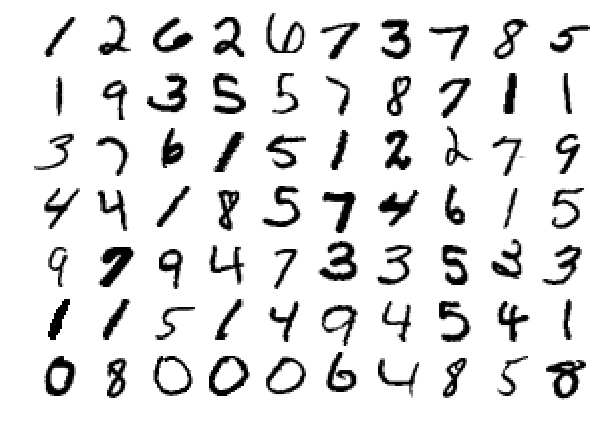

In [14]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [12]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### Model Building

In [13]:
from sklearn import model_selection

In [14]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.2,random_state = 101,stratify=y)

In [15]:
X_train.shape

(8400, 784)

In [16]:
y_train.shape

(8400,)

In [17]:
X_test.shape

(33600, 784)

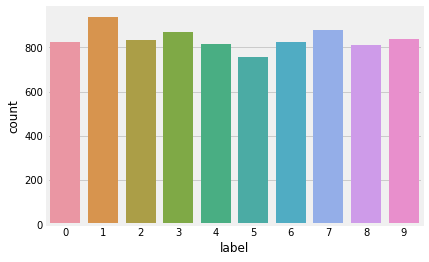

In [18]:
sns.countplot(y_train)

In [19]:
y_train.value_counts()

1    937
7    880
3    870
9    838
2    835
6    827
0    826
4    815
8    813
5    759
Name: label, dtype: int64

In [20]:
#scaling the model set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
#hyper parameter tuning

params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC()

model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)


In [25]:
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 27.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [23]:
#import pickle
#with open('/content/drive/My Drive/svm_rbf.pkl', 'wb') as pkobj:
#    pickle.dump(model_cv, pkobj)

In [ ]:
#with open('/content/drive/My Drive/svm_rbf.pkl', 'rb') as pkobj:
#    model_cv = pickle.load(pkobj)

In [26]:
model_cv.best_params_

{'C': 100, 'gamma': 0.001}

In [27]:
model_cv.best_score_

0.9398809523809524

### Non Linear SVM Model: RBF

In [28]:
#clf = SVC(C=100,gamma = 0.001)
clf = SVC(C=model_cv.best_params_['C'], gamma=model_cv.best_params_['gamma'], kernel='rbf', random_state=21)
clf.fit(X_train, y_train) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=21, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_pred = clf.predict(X_test)

In [33]:
pd.Series(y_pred).value_counts()

1    3796
2    3600
7    3532
3    3419
0    3323
4    3281
9    3258
6    3217
8    3178
5    2996
dtype: int64

In [30]:
y_test.value_counts()

1    3747
7    3521
3    3481
9    3350
2    3342
6    3310
0    3306
4    3257
8    3250
5    3036
Name: label, dtype: int64

In [31]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[3228,    0,   19,    3,    7,   10,   26,    4,    8,    1],
       [   0, 3682,   21,    8,    7,    3,    5,    6,   10,    5],
       [  18,   32, 3161,   36,   26,    4,   11,   32,   17,    5],
       [   6,   17,   92, 3204,    4,   51,    3,   40,   45,   19],
       [   5,   10,   45,    3, 3086,    3,   17,   12,    3,   73],
       [  17,   12,   26,   76,   13, 2822,   22,    8,   28,   12],
       [  24,    1,   99,    1,   16,   40, 3117,    3,    9,    0],
       [   5,   19,   59,   10,   35,    2,    0, 3326,    4,   61],
       [  10,   15,   40,   47,   16,   49,   16,   16, 3027,   14],
       [  10,    8,   38,   31,   71,   12,    0,   85,   27, 3068]],
      dtype=int64)

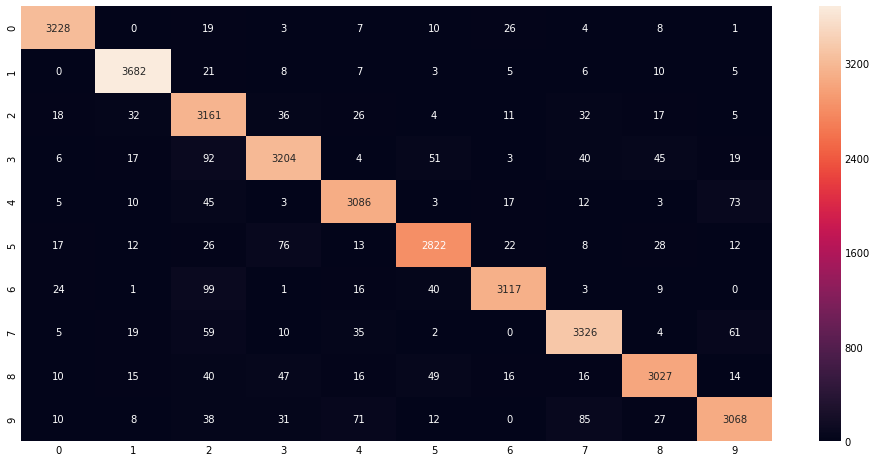

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(cmat, annot=True, fmt='g')

In [33]:
metrics.accuracy_score(y_test, y_pred)

0.9440773809523809

In [34]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97      3306
          1       0.97      0.98      0.98      3747
          2       0.88      0.95      0.91      3342
          3       0.94      0.92      0.93      3481
          4       0.94      0.95      0.94      3257
          5       0.94      0.93      0.94      3036
          6       0.97      0.94      0.96      3310
          7       0.94      0.94      0.94      3521
          8       0.95      0.93      0.94      3250
          9       0.94      0.92      0.93      3350

avg / total       0.94      0.94      0.94     33600



The non linear RBF model has 94% accuracy. Let's dig into it.

### Visualising on the Test Data

In [36]:
test_data = pd.read_csv(r'E:\Data Science\SVM\Assignment\test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#scaling the test data
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [38]:
y_pred_final = clf.predict(test_data)

In [40]:
test_data.shape

(28000, 784)

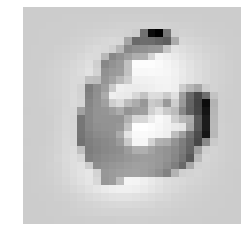

In [41]:
some_digit = test_data[500]
plot_digit(pd.Series(some_digit))

In [42]:
#checking the test data with the predicted data
y_pred_final[500]

6

In [43]:
id = np.arange(1,28001,1)
submission_df = pd.concat([pd.Series(id),pd.Series(y_pred_final)],axis=1)
submission_df.columns = ['ImageId','Label']
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [44]:
submission_df.to_csv('mnist_submission_svm_non_linear.csv',index=False)

In [45]:
#hyper parameter tuning
params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC(kernel='poly')

model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)


In [46]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 35.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [ ]:
#with open('svm_poly.pkl', 'wb') as pkobj:
    #pickle.dump(model_cv, pkobj)

In [ ]:
model_cv.best_score_

In [104]:
model_cv.best_params_

{'C': 1, 'gamma': 0.01}

### Non Linear SVM Model: Poly Kernel

In [105]:
#clf = SVC(C=100,gamma = 0.001)
clf = SVC(C=model_cv.best_params_['C'], gamma=model_cv.best_params_['gamma'], kernel='poly', random_state=21)
clf.fit(X_train, y_train) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=21, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
y_pred = clf.predict(X_test)

In [108]:
metrics.accuracy_score(y_test, y_pred)

0.9536904761904762

In [110]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3306
           1       0.99      0.99      0.99      3747
           2       0.96      0.93      0.94      3342
           3       0.95      0.94      0.95      3481
           4       0.93      0.97      0.95      3257
           5       0.95      0.94      0.94      3036
           6       0.98      0.96      0.97      3310
           7       0.96      0.94      0.95      3521
           8       0.90      0.96      0.93      3250
           9       0.93      0.93      0.93      3350

   micro avg       0.95      0.95      0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



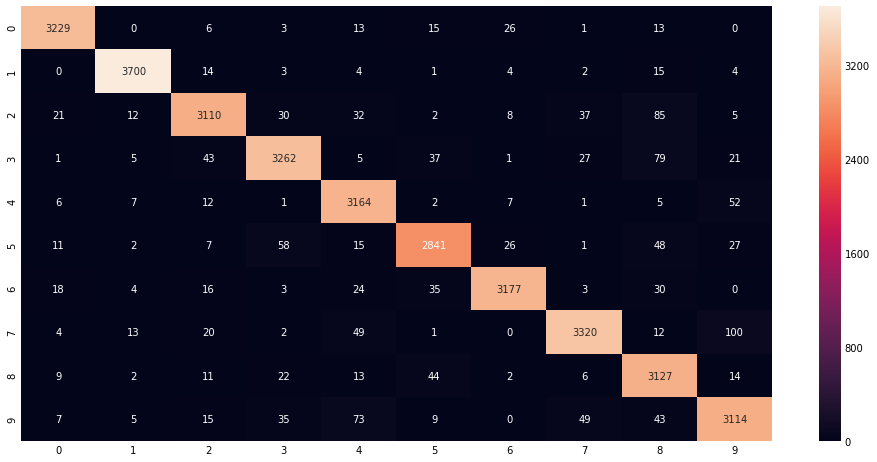

In [109]:
plt.figure(figsize=(15,8))
cmat = confusion_matrix(y_test, y_pred)
sns.heatmap(cmat, annot=True, fmt='g')

In [111]:
y_pred_svm_poly = rfc.predict(test_data)

In [116]:
id = np.arange(1,28001,1)
submission_df = pd.concat([pd.Series(id),pd.Series(y_pred_svm_poly)],axis=1)
submission_df.columns = ['ImageId','Label']
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [117]:
submission_df.to_csv('mnist_submission_svm_poly.csv',index=False)

Hence we can see that poly kernel svm model has approx 95% accuracy, which is better than the RBF. Let's check the linear model on the dataset.

### Linear SVM Model

In [ ]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

The linear model has an accuracy of 91% which makes the poly kernel svm model better fit for the dataset.

### Hyper Parameter Tuning on the Final RBF Model:

In [ ]:
params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC()

model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)

In [ ]:
model_cv.fit(X_train, y_train)  

In [ ]:
model_cv.best_params_

In [ ]:
model_cv.best_score_

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
clf = SVC(C=model_cv.best_params_['C'], gamma=model_cv.best_params_['gamma'], kernel='poly', random_state=21)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

In [ ]:
cmat = confusion_matrix(y_test, y_pred)
cmat

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(cmat, annot=True, fmt='g')

In [ ]:
print(metrics.classification_report(y_test, y_pred))

### Conclusion:

We have found out that the poly kernel model has the best accuracy, thereby accurately determining the maximum number of digits. Hence we move forward by implementing the poly kernel svm non linear model on the dataset.